# Deep Learning using Python

## A Neural Network using Keras

### Pima Indians Onset of Diabetes Dataset

In [103]:
# Importing some libraries
import pandas as pd
import numpy as np

# Import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.utils import np_utils

# Import from sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Import from matplotlib
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/pima-indians-diabetes.csv"
pima_data = pd.read_csv(url, header = None)
pima_data.shape

(768, 9)

In [36]:
#Setting a random seed
seed = 7
np.random.seed(seed)

# Seperating predictors and response variable.
X = pima_data.iloc[:,0:8]
y = pima_data.iloc[:,8]

Now we will create our model :-

1. We have 8 input neurons corresponding to 8 input variables.
2. weight intilization will be done using a uniform distribution.
3. For the hidden layers we will use 'relu' activation function.
4. For output layer we will use 'sigmoid' activation function.


In [29]:
# Create model 
model = Sequential()
# First hidden layer with 12 neurons.
model.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Second hidden layer with 8 neurons
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
# Output layer with 11 neuron.
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [30]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
# Fit the model
model.fit(X, y, epochs = 150, batch_size = 10)

Epoch 1/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6750 - accuracy: 0.6510
Epoch 2/150
768/768 [==============================] - 0s 247us/step - loss: 0.6558 - accuracy: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 244us/step - loss: 0.6408 - accuracy: 0.6393
Epoch 4/150
768/768 [==============================] - 0s 244us/step - loss: 0.6267 - accuracy: 0.6576
Epoch 5/150
768/768 [==============================] - 0s 242us/step - loss: 0.6169 - accuracy: 0.6888
Epoch 6/150
768/768 [==============================] - 0s 231us/step - loss: 0.5998 - accuracy: 0.6771
Epoch 7/150
768/768 [==============================] - 0s 229us/step - loss: 0.6028 - accuracy: 0.6810
Epoch 8/150
768/768 [==============================] - 0s 233us/step - loss: 0.5958 - accuracy: 0.7018
Epoch 9/150
768/768 [==============================] - 0s 241us/step - loss: 0.5910 - accuracy: 0.6875
Epoch 10/150
768/768 [==============================] - 0s 229us/step - los

In [35]:
scores = model.evaluate(X,y)
print("%s %.2f%%" %(model.metrics_names[1], scores[1] * 100))

768/768 [==============================] - 0s 30us/step
accuracy 78.91%


#### Data Splitting using Automatic Verification Dataset

In [37]:
# Fit the model
model.fit(X, y, validation_split = 0.33, epochs = 150, batch_size = 10)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 320us/step - loss: 0.4723 - accuracy: 0.7724 - val_loss: 0.4120 - val_accuracy: 0.8071
Epoch 2/150
514/514 [==============================] - 0s 284us/step - loss: 0.4695 - accuracy: 0.7743 - val_loss: 0.4452 - val_accuracy: 0.7992
Epoch 3/150
514/514 [==============================] - 0s 299us/step - loss: 0.4752 - accuracy: 0.7763 - val_loss: 0.4225 - val_accuracy: 0.7874
Epoch 4/150
514/514 [==============================] - 0s 321us/step - loss: 0.4639 - accuracy: 0.7840 - val_loss: 0.4213 - val_accuracy: 0.8150
Epoch 5/150
514/514 [==============================] - 0s 318us/step - loss: 0.4878 - accuracy: 0.7743 - val_loss: 0.4350 - val_accuracy: 0.7874
Epoch 6/150
514/514 [==============================] - 0s 297us/step - loss: 0.4685 - accuracy: 0.7821 - val_loss: 0.4434 - val_accuracy: 0.7953
Epoch 7/150
514/514 [==============================] - 0s 300us/step - loss: 0.4682 

Epoch 57/150
514/514 [==============================] - 0s 292us/step - loss: 0.4563 - accuracy: 0.7646 - val_loss: 0.4596 - val_accuracy: 0.8031
Epoch 58/150
514/514 [==============================] - 0s 290us/step - loss: 0.4592 - accuracy: 0.7802 - val_loss: 0.4517 - val_accuracy: 0.7913
Epoch 59/150
514/514 [==============================] - 0s 304us/step - loss: 0.4520 - accuracy: 0.7899 - val_loss: 0.4779 - val_accuracy: 0.8031
Epoch 60/150
514/514 [==============================] - 0s 298us/step - loss: 0.4680 - accuracy: 0.7626 - val_loss: 0.4384 - val_accuracy: 0.7756
Epoch 61/150
514/514 [==============================] - 0s 300us/step - loss: 0.4552 - accuracy: 0.7724 - val_loss: 0.4529 - val_accuracy: 0.8110
Epoch 62/150
514/514 [==============================] - 0s 301us/step - loss: 0.4480 - accuracy: 0.7879 - val_loss: 0.4488 - val_accuracy: 0.7913
Epoch 63/150
514/514 [==============================] - 0s 307us/step - loss: 0.4477 - accuracy: 0.7957 - val_loss: 0.4615 -

514/514 [==============================] - 0s 289us/step - loss: 0.4363 - accuracy: 0.8132 - val_loss: 0.4658 - val_accuracy: 0.7992
Epoch 114/150
514/514 [==============================] - 0s 285us/step - loss: 0.4357 - accuracy: 0.7918 - val_loss: 0.4666 - val_accuracy: 0.8031
Epoch 115/150
514/514 [==============================] - 0s 282us/step - loss: 0.4372 - accuracy: 0.7918 - val_loss: 0.4788 - val_accuracy: 0.7756
Epoch 116/150
514/514 [==============================] - 0s 282us/step - loss: 0.4498 - accuracy: 0.7840 - val_loss: 0.4676 - val_accuracy: 0.7913
Epoch 117/150
514/514 [==============================] - 0s 320us/step - loss: 0.4435 - accuracy: 0.7977 - val_loss: 0.4592 - val_accuracy: 0.7953
Epoch 118/150
514/514 [==============================] - 0s 343us/step - loss: 0.4446 - accuracy: 0.7860 - val_loss: 0.4688 - val_accuracy: 0.8071
Epoch 119/150
514/514 [==============================] - 0s 322us/step - loss: 0.4479 - accuracy: 0.7977 - val_loss: 0.4664 - val_ac

#### Data Splitting using Manual Verification Dataset

In [41]:
#Splitting data into train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 150, batch_size = 10)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 377us/step - loss: 0.4399 - accuracy: 0.7918 - val_loss: 0.4492 - val_accuracy: 0.7874
Epoch 2/150
514/514 [==============================] - 0s 323us/step - loss: 0.4337 - accuracy: 0.7802 - val_loss: 0.4528 - val_accuracy: 0.7953
Epoch 3/150
514/514 [==============================] - 0s 324us/step - loss: 0.4353 - accuracy: 0.7821 - val_loss: 0.4763 - val_accuracy: 0.7913
Epoch 4/150
514/514 [==============================] - 0s 316us/step - loss: 0.4264 - accuracy: 0.7918 - val_loss: 0.4566 - val_accuracy: 0.7992
Epoch 5/150
514/514 [==============================] - 0s 309us/step - loss: 0.4281 - accuracy: 0.7938 - val_loss: 0.4642 - val_accuracy: 0.7874
Epoch 6/150
514/514 [==============================] - 0s 304us/step - loss: 0.4265 - accuracy: 0.7957 - val_loss: 0.4507 - val_accuracy: 0.7835
Epoch 7/150
514/514 [==============================] - 0s 297us/step - loss: 0.4186 

Epoch 57/150
514/514 [==============================] - 0s 335us/step - loss: 0.4016 - accuracy: 0.7977 - val_loss: 0.4951 - val_accuracy: 0.7756
Epoch 58/150
514/514 [==============================] - 0s 314us/step - loss: 0.4034 - accuracy: 0.8132 - val_loss: 0.4858 - val_accuracy: 0.7717
Epoch 59/150
514/514 [==============================] - 0s 299us/step - loss: 0.4010 - accuracy: 0.8093 - val_loss: 0.5049 - val_accuracy: 0.7598
Epoch 60/150
514/514 [==============================] - 0s 305us/step - loss: 0.4010 - accuracy: 0.8035 - val_loss: 0.4898 - val_accuracy: 0.7756
Epoch 61/150
514/514 [==============================] - 0s 302us/step - loss: 0.4020 - accuracy: 0.8016 - val_loss: 0.4849 - val_accuracy: 0.7874
Epoch 62/150
514/514 [==============================] - 0s 309us/step - loss: 0.3958 - accuracy: 0.8113 - val_loss: 0.4921 - val_accuracy: 0.7638
Epoch 63/150
514/514 [==============================] - 0s 314us/step - loss: 0.3943 - accuracy: 0.8171 - val_loss: 0.4920 -

514/514 [==============================] - 0s 289us/step - loss: 0.3857 - accuracy: 0.8054 - val_loss: 0.5046 - val_accuracy: 0.7717
Epoch 114/150
514/514 [==============================] - 0s 284us/step - loss: 0.3863 - accuracy: 0.8113 - val_loss: 0.5212 - val_accuracy: 0.7717
Epoch 115/150
514/514 [==============================] - 0s 281us/step - loss: 0.3927 - accuracy: 0.8268 - val_loss: 0.5162 - val_accuracy: 0.7559
Epoch 116/150
514/514 [==============================] - 0s 280us/step - loss: 0.3918 - accuracy: 0.8132 - val_loss: 0.4970 - val_accuracy: 0.7677
Epoch 117/150
514/514 [==============================] - 0s 277us/step - loss: 0.3895 - accuracy: 0.8152 - val_loss: 0.4986 - val_accuracy: 0.7835
Epoch 118/150
514/514 [==============================] - 0s 282us/step - loss: 0.3787 - accuracy: 0.8366 - val_loss: 0.5195 - val_accuracy: 0.7559
Epoch 119/150
514/514 [==============================] - 0s 279us/step - loss: 0.3940 - accuracy: 0.8152 - val_loss: 0.5080 - val_ac

#### Manual K-Fold Cross Validation

In [44]:
#Setting a random seed
seed = 7
np.random.seed(seed)

# Seperating predictors and response variable.
X = np.array(pima_data.iloc[:,0:8])
y = np.array(pima_data.iloc[:,8])

# define 10-fold cross validation test harness.
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
cvscores = []

for train, test in kfold.split(X,y):
    model = Sequential()
    model.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.fit(X[train], y[train], epochs = 150, batch_size = 10, verbose = 0)
    scores = model.evaluate(X[test], y[test], verbose = 0)
    print("%s %.2f%%" %(model.metrics_names[1], scores[1] * 100))
    cvscores.append(scores[1] * 100)
    

accuracy 79.22%
accuracy 76.62%
accuracy 74.03%
accuracy 71.43%
accuracy 68.83%
accuracy 67.53%
accuracy 76.62%
accuracy 70.13%
accuracy 69.74%
accuracy 78.95%


In [45]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

73.31% (+/- 4.11%)


### Evaluate model using Cross validation

Here we will use a wrapper function from keras. This function takes a model as an input. So we need to create a function that create and compile a model.

In [5]:
#Setting a random seed
seed = 7
np.random.seed(seed)

# Seperating predictors and response variable.
X = np.array(pima_data.iloc[:,0:8])
y = np.array(pima_data.iloc[:,8])

def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [7]:
# Create a model from KerasClassifier
model = KerasClassifier(build_fn = create_model, nb_epoch = 150, batch_size = 10, verbose = 0)

In [9]:
#Evaluate using a 10-fold cross validation.
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.6497607588768005


### Grid Search Deep Learning Model Parameters

We are trying to optimize the 4 hyperparameters :-
1. Optimizer.
2. weight intializer.
3. No. of epochs.
4. Mini batches.

In [15]:
#Setting a random seed
seed = 7
np.random.seed(seed)

def create_model(kernel_initializer = 'glorot_uniform', optimizer = 'rmsprop'):
    model = Sequential()
    model.add(Dense(12, input_dim = 8, kernel_initializer = kernel_initializer, activation = 'relu'))
    model.add(Dense(8, kernel_initializer = kernel_initializer, activation = 'relu'))
    model.add(Dense(1, kernel_initializer = kernel_initializer, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

# Create a model from KerasClassifier
model = KerasClassifier(build_fn = create_model, verbose = 0)

# Grid Search epochs, batch_size and optimizer.
optimizers = ['adam','rmsprop']
kernel_initializer = ['glorot_uniform', 'normal','uniform']
epochs = (50,100,150)
batches = (5,10,20)

param_grid = dict(optimizer = optimizers, kernel_initializer = kernel_initializer,
                 nb_epoch = epochs, batch_size = batches)
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid_result = grid.fit(X,y)

In [16]:
print("Best search %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best search 0.655055 using {'batch_size': 5, 'kernel_initializer': 'normal', 'nb_epoch': 100, 'optimizer': 'adam'}


## Multiclass Classification
### Iris dataset

In [56]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Iris.csv"
iris = pd.read_csv(url, header = None)
iris.shape

(150, 5)

In [57]:
#Setting a random seed
seed = 7
np.random.seed(seed)

# Seperating predictors and response variable.
X = np.array(iris.iloc[:,0:4])
y = np.array(iris.iloc[:,4])

#Encode string values as numerical
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [58]:
# Define baseline function
def baseline_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 4, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(3, kernel_initializer = 'normal', activation = 'sigmoid'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# Create a model from KerasClassifier
estimator = KerasClassifier(build_fn = baseline_model, nb_epoch = 200, batch_size = 5, verbose = 0)

In [59]:
#Evaluate using a 10-fold cross validation.
kfold = KFold(n_splits = 10, shuffle = True)
results = cross_val_score(estimator, X,  dummy_y, cv = kfold)
print(results.mean()*100)

38.00000116229057


### Sonar Object Classification Dataset

In [60]:
url = "https://raw.githubusercontent.com/atystats/Deep-Learning-Python---Self-Learning/master/Datasets/Sonar_detection.csv"
sonar = pd.read_csv(url)
sonar.shape

(208, 61)

In [61]:
#Setting a random seed
seed = 7
np.random.seed(seed)

# Seperating predictors and response variable.
X = np.array(sonar.iloc[:,0:60])
y = np.array(sonar.iloc[:,60])

#Encode string values as numerical
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

In [62]:
# Define baseline function
def baseline_model():
    model = Sequential()
    model.add(Dense(60, input_dim = 60, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# Create a model from KerasClassifier
estimator = KerasClassifier(build_fn = baseline_model, nb_epoch = 100, batch_size = 5, verbose = 0)

In [63]:
#Evaluate using a 10-fold cross validation.
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
results = cross_val_score(estimator, X,  encoded_Y, cv = kfold)
print(results.mean()*100)

53.85714530944824


One way to improve the Neural networks to have a consistent input values, both in scale and distribution. We will standardize the input values first.

In [65]:
# evaluate baseline model with standardized dataset.
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasClassifier(build_fn = baseline_model, nb_epoch = 100, batch_size = 5, verbose = 0)))
pipeline = Pipeline(estimators)

In [66]:
# Evaluate using a 10-fold cross validation.
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
results = cross_val_score(pipeline, X,  encoded_Y, cv = kfold)
print(results.mean()*100)

71.11904919147491


## Tuning Layers and neurons in the model

### Evaluating a Smaller Network
We will try with less no of neurons in the hidden layer.

In [68]:
# Define baseline function
def create_smaller():
    model = Sequential()
    model.add(Dense(30, input_dim = 60, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# evaluate baseline model with standardized dataset.
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasClassifier(build_fn = create_smaller, nb_epoch = 100, batch_size = 5, verbose = 0)))
pipeline = Pipeline(estimators)

# Evaluate using a 10-fold cross validation.
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
results = cross_val_score(pipeline, X,  encoded_Y, cv = kfold)
print(results.mean()*100)

74.52381074428558


### Evaluating a Larger Network
We will try with less one more hidden layer in the network.

In [70]:
# Define baseline function
def create_larger():
    model = Sequential()
    model.add(Dense(60, input_dim = 60, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(30, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# evaluate baseline model with standardized dataset.
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasClassifier(build_fn = create_larger, nb_epoch = 100, batch_size = 5, verbose = 0)))
pipeline = Pipeline(estimators)

# Evaluate using a 10-fold cross validation.
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
results = cross_val_score(pipeline, X,  encoded_Y, cv = kfold)
print(results.mean()*100)

76.90476298332214


## Neural Networks for Regression using keras

### Boston Housing Prices

In [74]:
url = "https://raw.githubusercontent.com/atystats/Deep-Learning-Python---Self-Learning/master/Datasets/Boston_Housing_Data.csv"
Boston = pd.read_csv(url, header = None)
Boston.shape

(506, 14)

In [84]:
#Setting a random seed
seed = 7
np.random.seed(seed)

# Seperating predictors and response variable.
X = Boston.values[:,0:13]
y = Boston.values[:,13]

In [97]:
# Define baseline function
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal')) # Don't need to transform weighted output in output layer.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

# Create a model from KerasClassifier
estimator = KerasRegressor(build_fn = baseline_model, nb_epoch = 50, batch_size = 5, verbose = 0)

In [98]:
# Evaluate using a 10-fold cross validation.
kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)
results = cross_val_score(estimator, X,  y, cv = kfold)
print(-1 * results.mean())

119.29964818667266


Let's try the same with standardized variables.

In [99]:
# evaluate baseline model with standardized dataset.
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasRegressor(build_fn = baseline_model, nb_epoch = 50, batch_size = 5, verbose = 0)))
pipeline = Pipeline(estimators)

In [100]:
# Evaluate using a 10-fold cross validation.
kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)
results = cross_val_score(pipeline, X,  y, cv = kfold)
print(-1 * results.mean())

573.0206865018956


We will try a __deeper network.__

In [101]:
# Define baseline function
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal')) # Don't need to transform weighted output in output layer.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

# Create a model from KerasClassifier
estimator = KerasRegressor(build_fn = baseline_model, nb_epoch = 50, batch_size = 5, verbose = 0)

# evaluate baseline model with standardized dataset.
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasRegressor(build_fn = baseline_model, nb_epoch = 50, batch_size = 5, verbose = 0)))
pipeline = Pipeline(estimators)

# Evaluate using a 10-fold cross validation.
kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)
results = cross_val_score(pipeline, X,  y, cv = kfold)
print(-1 * results.mean())

572.0729478783701


We will try a __wider network topology.__

In [102]:
# Define baseline function
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal')) # Don't need to transform weighted output in output layer.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

# Create a model from KerasClassifier
estimator = KerasRegressor(build_fn = baseline_model, nb_epoch = 50, batch_size = 5, verbose = 0)

# evaluate baseline model with standardized dataset.
estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasRegressor(build_fn = baseline_model, nb_epoch = 50, batch_size = 5, verbose = 0)))
pipeline = Pipeline(estimators)

# Evaluate using a 10-fold cross validation.
kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)
results = cross_val_score(pipeline, X,  y, cv = kfold)
print(-1 * results.mean())

561.6449495203354


## Understand model behavior during training by plotting history 

In [106]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/pima-indians-diabetes.csv"
pima_data = pd.read_csv(url, header = None)
pima_data.shape

#Setting a random seed
seed = 7
np.random.seed(seed)

# Seperating predictors and response variable.
X = pima_data.iloc[:,0:8]
y = pima_data.iloc[:,8]

# Create model 
model = Sequential()
# First hidden layer with 12 neurons.
model.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Second hidden layer with 8 neurons
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
# Output layer with 11 neuron.
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit the model
classifier = model.fit(X, y, validation_split = 0.33, epochs = 150, batch_size = 10, verbose = 0)
print(classifier.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


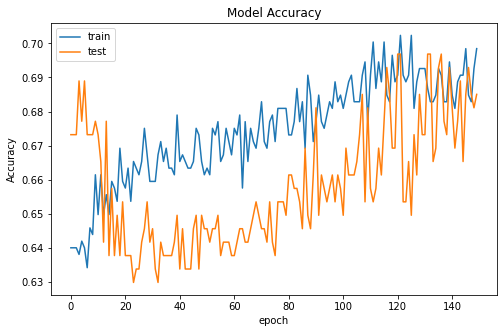

In [111]:
# Plotting the accuracy by each epoch
plt.figure(figsize = (8,5))
plt.plot(classifier.history['accuracy'], label = "train")
plt.plot(classifier.history['val_accuracy'], label = "test")
plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

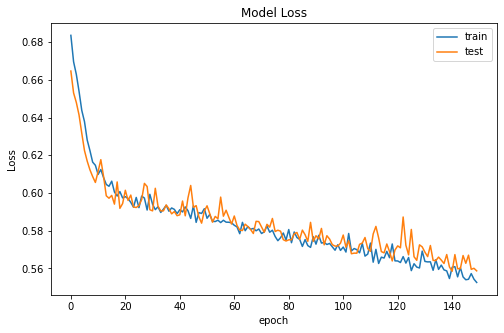

In [112]:
# Plotting the loss by each epoch
plt.figure(figsize = (8,5))
plt.plot(classifier.history['loss'], label = "train")
plt.plot(classifier.history['val_loss'], label = "test")
plt.title("Model Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()